In [1]:
#Standard Python Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Model Creation/Evaluation Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Audio Data Manipulation Imports
import random
import IPython.display as ipd

#File Path Navigation Import
import os

#Model Saving Import
import pickle

# Data

In [2]:
def list_files_with_subfolders(base_path):
    files_list = []
    for root, dirs, files in os.walk(base_path):
        for file_name in files:
            subfolder_name = os.path.relpath(root, base_path)
            files_list.append({'Folder': subfolder_name, 'File': file_name})
    return files_list

In [3]:
base_directory = 'data_raw'

In [4]:
files_list = list_files_with_subfolders(base_directory)
files_df = pd.DataFrame(files_list)

In [5]:
files_df.value_counts('Folder')

Folder
zero                  4052
five                  4052
yes                   4044
seven                 3998
no                    3941
nine                  3934
down                  3917
one                   3890
go                    3880
two                   3880
stop                  3872
six                   3860
on                    3845
left                  3801
eight                 3787
right                 3778
off                   3745
four                  3728
three                 3727
up                    3723
dog                   2128
wow                   2123
house                 2113
marvin                2100
bird                  2064
happy                 2054
cat                   2031
sheila                2022
bed                   2014
tree                  1759
backward              1664
visual                1592
follow                1579
learn                 1575
forward               1557
_background_noise_       7
.                    

In [6]:
files_df

,Folder,File
0,.,.DS_Store
1,.,validation_list.txt
2,.,LICENSE
3,.,README.md
4,.,testing_list.txt
...,...,...
105836,four,25e95412_nohash_1.wav
105837,four,92521ccc_nohash_0.wav
105838,four,29dce108_nohash_0.wav
105839,four,c6389ab0_nohash_0.wav


In [7]:
files_df = files_df[files_df['Folder'] != '.']

In [8]:
files_df

,Folder,File
5,right,8e523821_nohash_2.wav
6,right,bb05582b_nohash_3.wav
7,right,988e2f9a_nohash_0.wav
8,right,a69b9b3e_nohash_0.wav
9,right,1eddce1d_nohash_3.wav
...,...,...
105836,four,25e95412_nohash_1.wav
105837,four,92521ccc_nohash_0.wav
105838,four,29dce108_nohash_0.wav
105839,four,c6389ab0_nohash_0.wav


In [9]:
files_df['UserID'] = files_df['File'].apply(lambda x: x.split('_')[0])

<ipython-input-9-4ee925372c93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_df['UserID'] = files_df['File'].apply(lambda x: x.split('_')[0])


In [10]:
files_df

,Folder,File,UserID
5,right,8e523821_nohash_2.wav,8e523821
6,right,bb05582b_nohash_3.wav,bb05582b
7,right,988e2f9a_nohash_0.wav,988e2f9a
8,right,a69b9b3e_nohash_0.wav,a69b9b3e
9,right,1eddce1d_nohash_3.wav,1eddce1d
...,...,...,...
105836,four,25e95412_nohash_1.wav,25e95412
105837,four,92521ccc_nohash_0.wav,92521ccc
105838,four,29dce108_nohash_0.wav,29dce108
105839,four,c6389ab0_nohash_0.wav,c6389ab0


In [11]:
files_df.value_counts('UserID')

UserID
c50f55b8    316
893705bb    263
cce7416f    250
2aca1e72    236
ddedba85    226
           ... 
6c2dd2d5      1
090efdc4      1
66f07c09      1
65303f47      1
white         1
Length: 2625, dtype: int64

In [12]:
user_file_counts = files_df['UserID'].value_counts().reset_index()
user_file_counts.columns = ['UserID', 'FileCount']
user_file_counts

,UserID,FileCount
0,c50f55b8,316
1,893705bb,263
2,cce7416f,250
3,2aca1e72,236
4,ddedba85,226
...,...,...
2620,9080f6d3,1
2621,3fd21070,1
2622,d1b4694a,1
2623,3a6d4afd,1


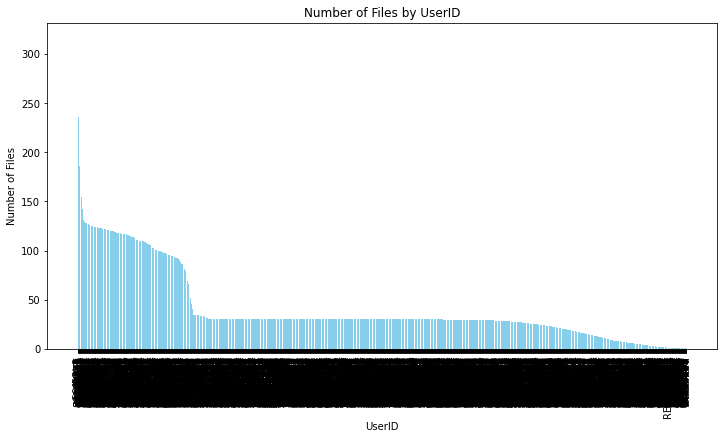

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(user_file_counts['UserID'], user_file_counts['FileCount'], color='skyblue')
plt.xlabel('UserID')
plt.ylabel('Number of Files')
plt.title('Number of Files by UserID')
plt.xticks(rotation=90)
plt.show()

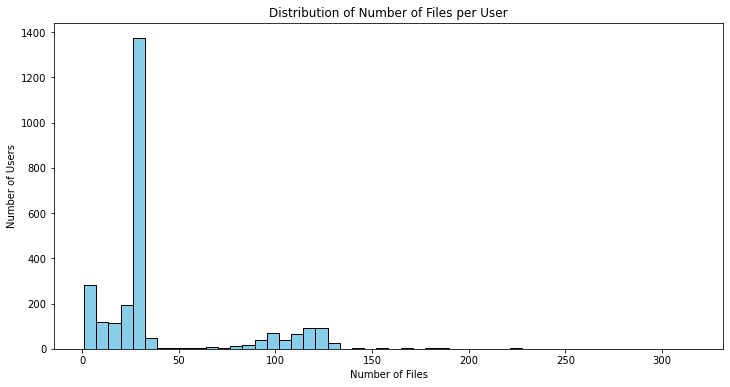

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(user_file_counts['FileCount'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Files')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Files per User')
plt.show()

In [15]:
folder_counts = files_df['Folder'].value_counts().reset_index()
folder_counts.columns = ['Folder', 'FolderCount']
folder_counts

,Folder,FolderCount
0,five,4052
1,zero,4052
2,yes,4044
3,seven,3998
4,no,3941
5,nine,3934
6,down,3917
7,one,3890
8,go,3880
9,two,3880


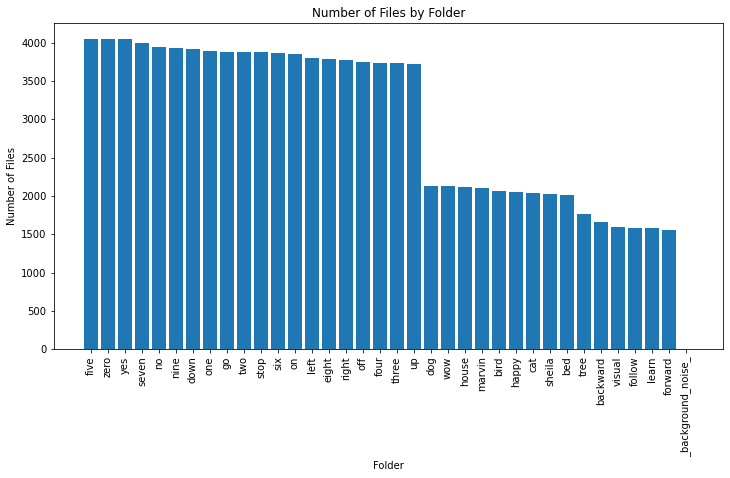

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(folder_counts['Folder'], folder_counts['FolderCount'])
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.title('Number of Files by Folder')
plt.xticks(rotation=90)
plt.show()

# Lets take a look at a wav file

In [17]:
import torchaudio
import torchaudio.transforms as T

# Load the .wav file
waveform, original_sample_rate = torchaudio.load('data_numbers_wav/one/0a2b400e_nohash_0.wav')

# Resample to 8000 Hz
resampler = T.Resample(orig_freq=original_sample_rate, new_freq=8000)
waveform_resampled = resampler(waveform)

In [18]:
print(waveform_resampled.shape)
print(original_sample_rate)
print(8000) 

torch.Size([1, 8000])
16000
8000


In [19]:
mel_spectrogram_transform = T.MelSpectrogram(sample_rate=8000, n_mels=128)
mel_spectrogram = mel_spectrogram_transform(waveform_resampled)

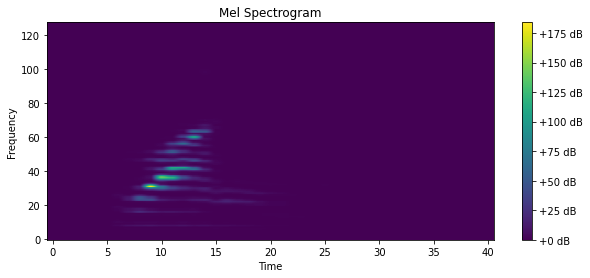

In [20]:
mel_spectrogram_np = mel_spectrogram.squeeze().numpy()

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram_np, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

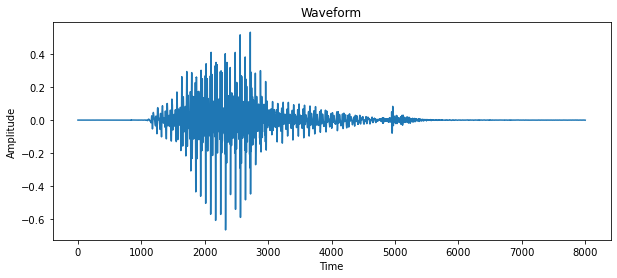

In [21]:
waveform_np = waveform_resampled.squeeze().numpy()

# Plot the waveform using waveshow
plt.figure(figsize=(10, 4))
plt.plot(waveform_np)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Creating subset for modeling

In [23]:
import os
import random
import torchaudio
import torchaudio.transforms as T
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

def read_as_dict(path):
    result = {}
    
    for filename in os.listdir(path):
        if filename == '.DS_Store':
            continue
        file_path = os.path.join(path, filename)
        # print(f"Processing file: {file_path}")
        
        waveform, original_sample_rate = torchaudio.load(file_path)
        resampler = T.Resample(orig_freq=original_sample_rate, new_freq=8000)
        waveform_resampled = resampler(waveform)

        # Ensure waveform is exactly 8000 samples long
        if waveform_resampled.shape[1] > 8000:
            waveform_resampled = waveform_resampled[:, :8000]
        elif waveform_resampled.shape[1] < 8000:
            padding_size = 8000 - waveform_resampled.shape[1]
            waveform_resampled = F.pad(waveform_resampled, (0, padding_size))

        username = filename.split('_')[0]
        if username in result:
            result[username].append(waveform_resampled)
        else:
            result[username] = [waveform_resampled]
    
   # print(f"Final result: {result}")
    return result

def to_positive_pairs(user_to_audio, limit):
    # construct queue of user samples
    pairs = []
    for user, audios in user_to_audio.items():
        user_pairs = []
        for i in range(len(audios)):
            for j in range(i + 1, len(audios)):
                if len(user_pairs) < 5: 
                    user_pairs.append((audios[i], audios[j], 1)) 
                else:
                    break
            if len(user_pairs) >= limit: # repeat break for each loop
                break
        pairs.extend(user_pairs)

    random.Random(42).shuffle(pairs)
        
    return pairs[:limit]

def to_negative_pairs(user_to_audio, limit):
    neg_pairs = []

    # construct queue of user samples
    index_user_sample = []
    for user, audios in user_to_audio.items():
        for audio in audios:
            index_user_sample.append((user, audio))

    queue1 = list(index_user_sample)
    random.Random(42).shuffle(queue1)
    
    queue2 = list(index_user_sample)
    random.Random(24).shuffle(queue2)

    for i in range(len(queue1)):
        if queue1[i][0] != queue2[i][0]:
            neg_pairs.append((queue1[i][1], queue2[i][1], 0))

            if len(neg_pairs) == limit:
                break
        
    return neg_pairs


one = read_as_dict('data_numbers_wav/one')
# print(list(one.items())[:1])

limit = 2000

positive_pairs = to_positive_pairs(one, limit=limit // 2)
print(positive_pairs)

negative_pairs = to_negative_pairs(one, limit=limit // 2)
print(negative_pairs)

p_train, p_test, n_train, n_test = train_test_split(positive_pairs, negative_pairs, test_size=0.2, random_state=42)
train = p_train + n_train
test = p_test + n_test

random.Random(42).shuffle(train)
random.Random(42).shuffle(test)


[(tensor([[-5.1841e-04, -3.0745e-05,  1.1021e-04,  ...,  1.8778e-03,
          3.7556e-05, -4.3596e-05]]), tensor([[0.0004, 0.0017, 0.0014,  ..., 0.0011, 0.0013, 0.0008]]), 1), (tensor([[-0.0002, -0.0003, -0.0002,  ..., -0.0007, -0.0009, -0.0003]]), tensor([[0.0004, 0.0005, 0.0003,  ..., 0.0004, 0.0006, 0.0004]]), 1), (tensor([[-5.3841e-08, -7.7949e-05, -1.7555e-04,  ...,  2.9199e-05,
         -3.0263e-05,  7.1869e-05]]), tensor([[ 9.6003e-05,  1.7572e-04,  2.2075e-04,  ..., -1.5432e-04,
         -1.6710e-04, -1.9239e-04]]), 1), (tensor([[-0.0006, -0.0005, -0.0007,  ..., -0.0007, -0.0009, -0.0009]]), tensor([[-0.0009, -0.0013, -0.0018,  ..., -0.0017, -0.0010, -0.0016]]), 1), (tensor([[-0.0002, -0.0007, -0.0008,  ...,  0.0010,  0.0018, -0.0032]]), tensor([[-5.2962e-05,  4.9471e-05, -3.0495e-05,  ...,  1.1016e-03,
         -8.0226e-05, -5.3232e-04]]), 1), (tensor([[-0.0432, -0.0634, -0.0647,  ..., -0.0594, -0.0562, -0.0594]]), tensor([[-0.0449, -0.0657, -0.0607,  ..., -0.0616, -0.0588, -

[(tensor([[-0.0001, -0.0008, -0.0008,  ...,  0.0004,  0.0003,  0.0012]]), tensor([[-1.3216e-05, -2.4195e-04,  5.5812e-05,  ...,  2.3687e-04,
          3.7700e-04,  4.5323e-04]]), 0), (tensor([[-0.0004, -0.0005, -0.0005,  ..., -0.0004, -0.0005, -0.0007]]), tensor([[ 4.5778e-05,  6.4604e-05,  4.4880e-05,  ..., -1.3744e-04,
         -1.0712e-04, -1.3618e-04]]), 0), (tensor([[ 4.5488e-05,  2.5538e-04,  4.0480e-04,  ..., -3.7785e-04,
         -4.4131e-04, -1.6294e-04]]), tensor([[3.2324e-05, 5.0399e-04, 7.6038e-04,  ..., 1.2068e-03, 1.1002e-03,
         9.1330e-04]]), 0), (tensor([[-0.0051, -0.0074, -0.0043,  ..., -0.0114, -0.0112, -0.0108]]), tensor([[ 2.6074e-03, -4.5555e-05, -5.2853e-05,  ..., -1.4856e-04,
         -6.0539e-04, -5.5899e-04]]), 0), (tensor([[ 7.1733e-07, -1.5286e-06, -1.2106e-05,  ..., -3.4047e-05,
         -2.8423e-05, -3.2862e-05]]), tensor([[-0.0001, -0.0002, -0.0002,  ..., -0.0018, -0.0008, -0.0007]]), 0), (tensor([[-1.0732e-04, -1.0937e-04, -7.7917e-05,  ...,  1.4076